# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('hearing_test.csv')

In [3]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [4]:
#Assignment: Infere Correlation

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [6]:
df[['age','physical_score']].describe()

,age,physical_score
count,5000.000000,5000.000000
mean,51.609000,32.760260
std,11.287001,8.169802
min,18.000000,-0.000000
25%,43.000000,26.700000
50%,51.000000,35.300000
75%,60.000000,38.900000
max,90.000000,50.000000


In [7]:
df['test_result'].value_counts()

test_result
1    3000
0    2000
Name: count, dtype: int64

<Axes: xlabel='test_result', ylabel='count'>

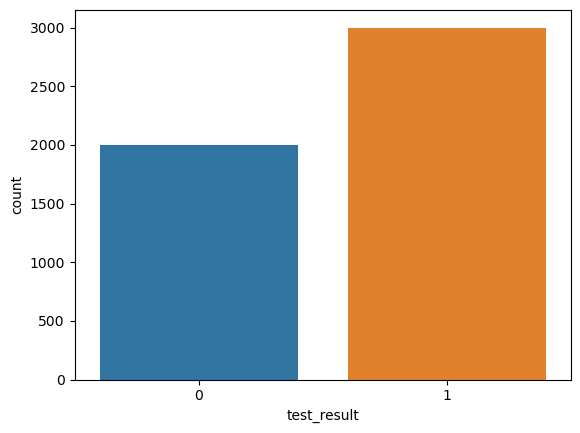

In [8]:
sns.countplot(data=df,x='test_result')

<Axes: xlabel='test_result', ylabel='physical_score'>

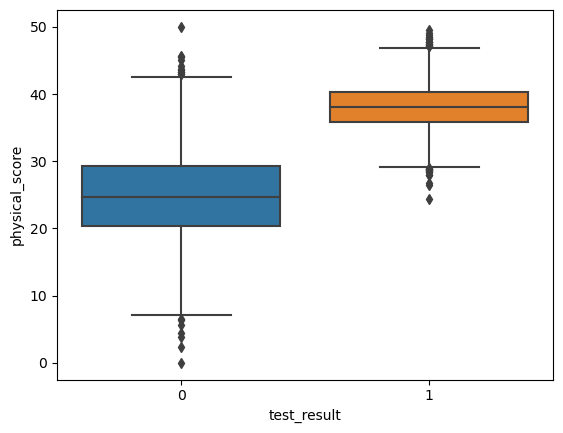

In [9]:
sns.boxplot(x='test_result',y='physical_score',data=df)

<Axes: xlabel='age', ylabel='physical_score'>

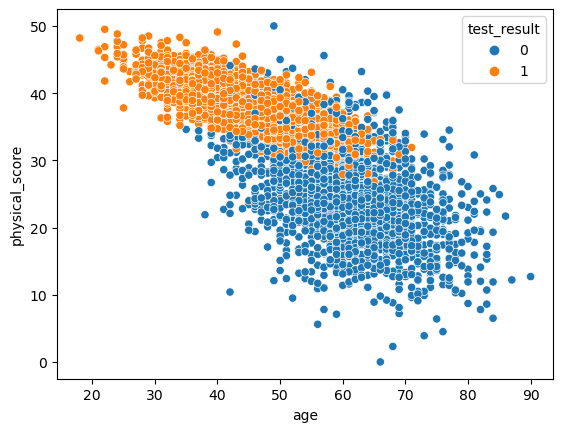

In [10]:
sns.scatterplot(x='age',y='physical_score',data=df,hue='test_result')

In [11]:
df.corr()

,age,physical_score,test_result
age,1.000000,-0.782146,-0.683171
physical_score,-0.782146,1.000000,0.792716
test_result,-0.683171,0.792716,1.000000


<Axes: xlabel='physical_score', ylabel='test_result'>

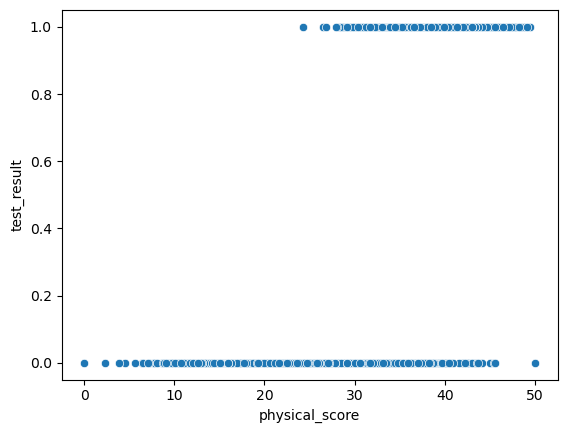

In [12]:
sns.scatterplot(y='test_result',x='physical_score',data=df)

## Train | Test Split

In [13]:
X = df.drop('test_result',axis=1)
y = df['test_result']

## Scaling

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=50)

In [16]:
sc = StandardScaler()

In [17]:
sc.fit(X_train)

StandardScaler()

In [18]:
sc_X_train = sc.transform(X_train)
sc_X_test = sc.transform(X_test)

## Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
#help(LogisticRegression)

In [21]:
log_model = LogisticRegression()

In [22]:
log_model.fit(sc_X_train,y_train)

LogisticRegression()

In [23]:
y_pred = log_model.predict(sc_X_test)
len(y_pred)

1000

In [24]:
y_proba = log_model.predict_proba(sc_X_test)

In [25]:
log_model.coef_

array([[-0.91384609,  3.40328558]])

* Odds of passing the test decrease (original coeff was negative) per unit increase in age
* Odds of passing the test increase (original coeff was positive) per unit increase in physical score
* Based on the ratio (3.4/0.9), the physical score is a stronger predictor than the age

## Model Performance

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay

In [27]:
accuracy_score(y_test,y_pred)

0.923

In [28]:
confusion_matrix(y_test,y_pred)

array([[351,  38],
       [ 39, 572]])

In [29]:
cm = confusion_matrix(y_test,y_pred, normalize='all')

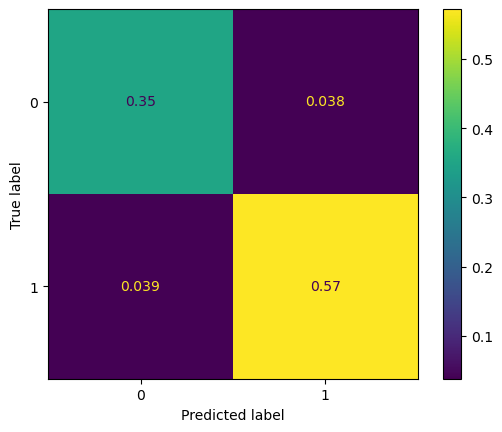

In [30]:
ConfusionMatrixDisplay(cm).plot()

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       389
           1       0.94      0.94      0.94       611

    accuracy                           0.92      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.92      0.92      0.92      1000



In [32]:
from sklearn import metrics

In [33]:
y_score = y_proba[:,1]

In [34]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_score)

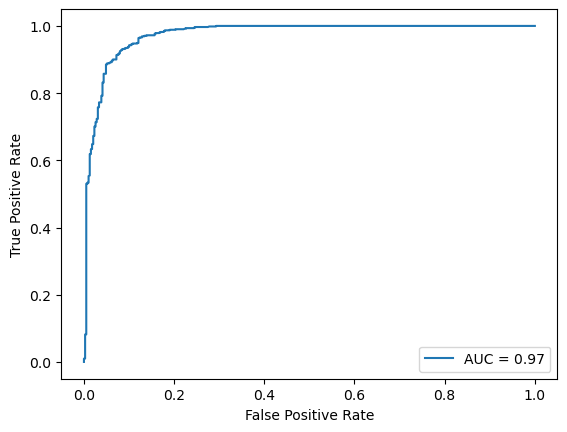

In [41]:
roc_auc = metrics.auc(fpr, tpr)
RocCurveDisplay(fpr = fpr, tpr=tpr, roc_auc = roc_auc).plot()


In [36]:
#help(metrics.precision_recall_curve)

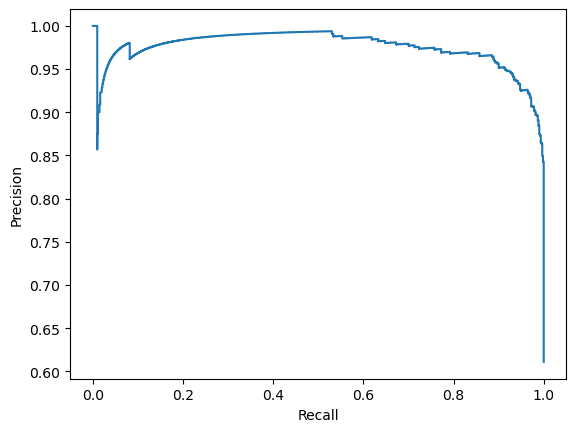

In [37]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test,y_score)

PrecisionRecallDisplay(precision=precision,recall=recall).plot()